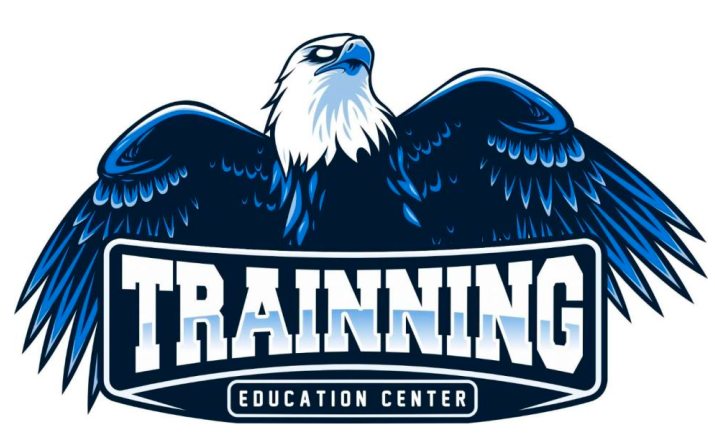

# Python aplicado a Big Data
## Dia 6 - 11/03/2021
### Instrutor: Leonardo Galler


### Instalação de pacotes

In [3]:
# Se não estiver instalado utilize esta célula para instalar
## Se estiver utilizando Conda
#import sys
#!conda install --yes --prefix {sys.prefix} matplotlib

In [4]:
# Se não estiver instalado utilize esta célula para instalar
## Se estiver utilizando Pip
#import sys
#!{sys.executable} -m pip install matplotlib

### Matriz de Correlação
Use a matriz de correlação para avaliar a força e a direção da relação entre dois itens ou variáveis. Valores de correlação altos e positivos indicam que os itens medem a mesma habilidade ou característica. Se os itens não estão altamente correlacionados, os itens podem medir diferentes características ou podem não estar claramente definidos.

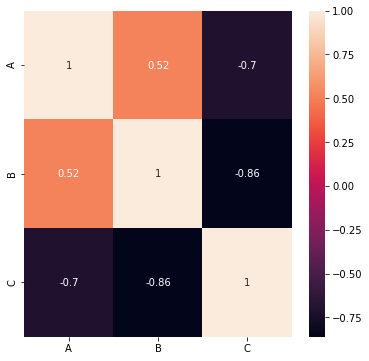

In [5]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'A': [45,37,42,35,39],
        'B': [38,31,26,28,33],
        'C': [10,15,17,21,12]
        }

df = pd.DataFrame(data,columns=['A','B','C'])

fig, ax = plt.subplots(figsize=(6,6))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.savefig('corr_matrix_sample.jpg')

#### Lendo arquivo de acidentes de Londres que foi gerado na aula anterior

In [23]:
# Diretorio do arquivo
data_path = '/home/leogaller/Documents/Freela/Trainning/Python-aplicado-big-data/notebooks/Dia-5/'

# Lendo o arquivo
df_london = pd.read_excel(data_path+'Acid_Londres_Domingo_2000.xlsx')

df_london.drop(['Police_Force','Day_of_Week','Longitude',
                'Latitude','Location_Easting_OSGR','Location_Northing_OSGR',
                'Local_Authority_(District)','Road_Type','Special_Conditions_at_Site',
                'Acc_Index','Unnamed: 0','Date','Local_Authority_(Highway)','LSOA_of_Accident_Location'],axis=1, inplace=True)

## Correlação nos dados de londres
london_corr_matrix = df_london.corr()

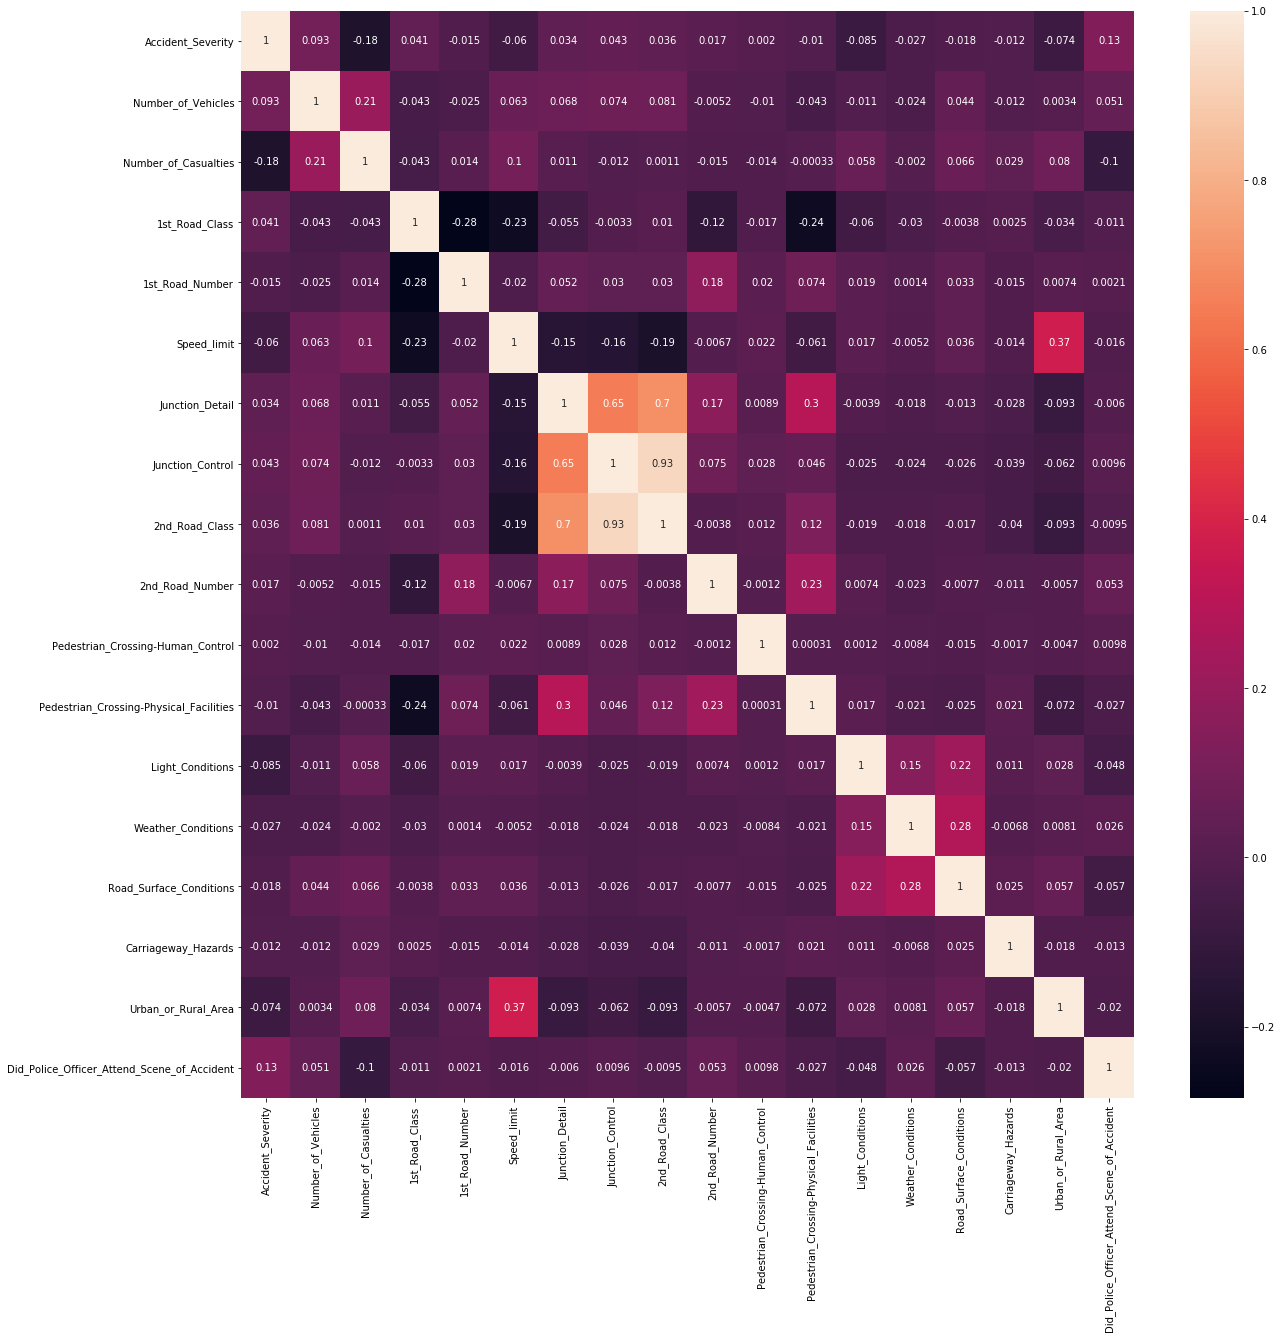

In [24]:
# Montando o heatmap
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(london_corr_matrix, annot=True)
plt.savefig('london_corr_matrix.jpg')

##### Coeficiente de Correlação
É definida como a covariância entre duas variáveis dividida pelo produto dos desvios padrão das duas variáveis.

Valores próximos de +1 indicam a presença de uma forte relação positiva entre X e Y, 
enquanto aqueles próximos de -1 indicam uma forte relação negativa entre X e Y.
Valores próximos de zero significam que há ausência de qualquer relação entre X e Y.

In [25]:
# Exemplo 1 - usando numpy(Limitado a utilização de 2 variáveis)

# Calculando a matriz de correlação
import numpy as np

np.random.seed(10)

# generating 10 random values for each of the two variables
X = np.random.randn(10)

Y = np.random.randn(10)

# computing the corrlation matrix
C = np.corrcoef(X,Y)

print(C)

[[1.         0.37258014]
 [0.37258014 1.        ]]


Como calculamos a matriz de correlação de 2 variáveis, suas dimensões são 2 x 2.
O valor 0,02 indica que não existe uma relação entre as duas variáveis. Isso era esperado, uma vez que seus valores foram gerados aleatoriamente.

##### Traçando a matriz de correlação
Utilizando datasets públicos do pacote scikit-learn.

In [28]:
# Leitura dos dados
from sklearn.datasets import load_breast_cancer

import pandas as pd

breast_cancer = load_breast_cancer()

data = breast_cancer.data

features = breast_cancer.feature_names

df = pd.DataFrame(data, columns = features)

print(df.shape)

print(features)
df.head(10)

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


#### Apresentando a matriz de correlação
Utilizando apenas 10 colunas

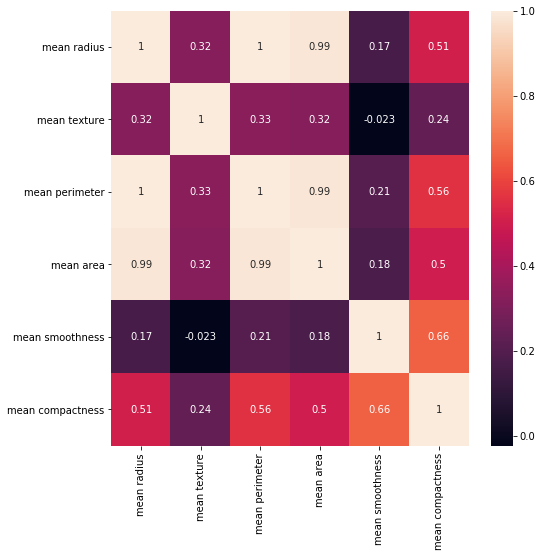

In [44]:
import seaborn as sns

import matplotlib.pyplot as plt

# Utilizando apenas 6 colunas
df_small = df.iloc[:,:6]

correlation_mat = df_small.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_mat, annot = True)

plt.show()

#### Interpretação da matriz de correlação

1. Cada célula da grade representa o valor do coeficiente de correlação entre duas variáveis.
2. O valor na posição (a, b) representa o coeficiente de correlação entre os recursos na linha "a" e coluna "b". Isso será igual ao valor na posição (b, a)
3. É uma   matrizquadrada - cada linha representa uma variável e todas as colunas representam as mesmas variáveis que linhas, portanto, o número de linhas = número de colunas.
4. É uma matriz simétrica - isso faz sentido porque a correlação entre a, b será a mesma que entre b, a.
5. Todos os  elementos diagonais são 1 . Como os elementos diagonais representam a correlação de cada variável consigo mesma, ela sempre será igual a 1.
6. Os pontos dos eixos denotam o recurso que cada um deles representa.
7. Um grande valor positivo (próximo a 1,0) indica uma forte correlação positiva, ou seja, se o valor de uma das variáveis aumenta, o valor da outra variável também aumenta.
8. Um grande valor negativo (próximo a -1,0) indica uma forte correlação negativa, ou seja, o valor de uma variável diminui com o aumento da outra e vice-versa.
9. Um valor próximo a 0 (positivo ou negativo) indica a ausência de qualquer correlação entre as duas variáveis e, portanto, essas variáveis são independentes uma da outra.
10. Cada célula na matrizacima também é representada por tons de uma cor. Aqui, tons mais escuros da cor indicam valores menores, enquanto tons mais brilhantes correspondem a valores maiores (próximo a 1).

#### Adicionando título e rótulos ao gráfico

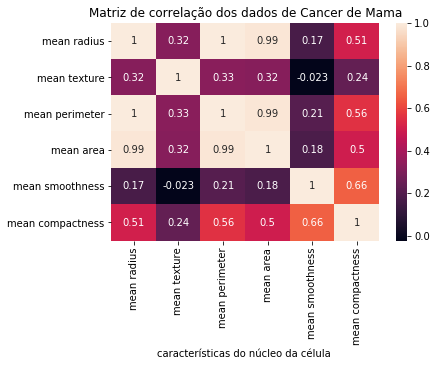

In [45]:
correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = True)

plt.title("Matriz de correlação dos dados de Cancer de Mama")

plt.xlabel("características do núcleo da célula ")

plt.show()

#### Classificando a matriz de correlação
Etapa 1 - Converter a matriz fornecida em uma série de valores unidimensional.

In [46]:
correlation_mat = df_small.corr()
corr_pairs = correlation_mat.unstack()
print(corr_pairs)
print()
print(type(corr_pairs))

mean radius       mean radius         1.000000
                  mean texture        0.323782
                  mean perimeter      0.997855
                  mean area           0.987357
                  mean smoothness     0.170581
                  mean compactness    0.506124
mean texture      mean radius         0.323782
                  mean texture        1.000000
                  mean perimeter      0.329533
                  mean area           0.321086
                  mean smoothness    -0.023389
                  mean compactness    0.236702
mean perimeter    mean radius         0.997855
                  mean texture        0.329533
                  mean perimeter      1.000000
                  mean area           0.986507
                  mean smoothness     0.207278
                  mean compactness    0.556936
mean area         mean radius         0.987357
                  mean texture        0.321086
                  mean perimeter      0.986507
             

[Método Unstack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html#pandas-dataframe-unstack) Pivoteie um nível dos rótulos de índice (necessariamente hierárquicos).
Retorna um DataFrame com um novo nível de rótulos de coluna cujo nível mais interno consiste nos rótulos de índice dinâmico.
Se o índice não for um MultiIndex, a saída será uma Série (o análogo da pilha quando as colunas não são um MultiIndex).

In [47]:
# Classificar os pares 
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

mean texture      mean smoothness    -0.023389
mean smoothness   mean texture       -0.023389
mean radius       mean smoothness     0.170581
mean smoothness   mean radius         0.170581
mean area         mean smoothness     0.177028
mean smoothness   mean area           0.177028
                  mean perimeter      0.207278
mean perimeter    mean smoothness     0.207278
mean texture      mean compactness    0.236702
mean compactness  mean texture        0.236702
mean area         mean texture        0.321086
mean texture      mean area           0.321086
                  mean radius         0.323782
mean radius       mean texture        0.323782
mean texture      mean perimeter      0.329533
mean perimeter    mean texture        0.329533
mean compactness  mean area           0.498502
mean area         mean compactness    0.498502
mean compactness  mean radius         0.506124
mean radius       mean compactness    0.506124
mean perimeter    mean compactness    0.556936
mean compactn

[Método sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html#pandas-dataframe-sort-values) Classifique pelos valores ao longo de cada eixo.

#### Seleção de pares de correlação netagiva

In [48]:
negative_pairs = sorted_pairs[sorted_pairs < 0]

print(negative_pairs)

mean texture     mean smoothness   -0.023389
mean smoothness  mean texture      -0.023389
dtype: float64


#### Seleção de pares de correlação forte

In [49]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

mean compactness  mean radius         0.506124
mean radius       mean compactness    0.506124
mean perimeter    mean compactness    0.556936
mean compactness  mean perimeter      0.556936
                  mean smoothness     0.659123
mean smoothness   mean compactness    0.659123
mean perimeter    mean area           0.986507
mean area         mean perimeter      0.986507
                  mean radius         0.987357
mean radius       mean area           0.987357
mean perimeter    mean radius         0.997855
mean radius       mean perimeter      0.997855
                  mean radius         1.000000
mean area         mean area           1.000000
mean perimeter    mean perimeter      1.000000
mean texture      mean texture        1.000000
mean smoothness   mean smoothness     1.000000
mean compactness  mean compactness    1.000000
dtype: float64


#### Converter uma matriz de covariância na matriz de correlação

In [50]:
cov = np.cov(df_small.T)

print(cov)

[[ 1.24189201e+01  4.90758156e+00  8.54471417e+01  1.22448341e+03
   8.45445983e-03  9.41970568e-02]
 [ 4.90758156e+00  1.84989087e+01  3.44397592e+01  4.85993787e+02
  -1.41477877e-03  5.37668058e-02]
 [ 8.54471417e+01  3.44397592e+01  5.90440480e+02  8.43577235e+03
   7.08360652e-02  7.14714125e-01]
 [ 1.22448341e+03  4.85993787e+02  8.43577235e+03  1.23843554e+05
   8.76178126e-01  9.26493079e+00]
 [ 8.45445983e-03 -1.41477877e-03  7.08360652e-02  8.76178126e-01
   1.97799700e-04  4.89573915e-04]
 [ 9.41970568e-02  5.37668058e-02  7.14714125e-01  9.26493079e+00
   4.89573915e-04  2.78918740e-03]]


In [52]:
# calcular os desvios padrão de cada um dos 6 recursos
stds = np.std(df_small, axis = 0) #shape = (6,)

stds_matrix = np.array([ [stds[i]*stds[j] for j in range(6)] for i in range(6) ])
print("matriz de desvios padrão da forma:",stds_matrix.shape)

matriz de desvios padrão da forma: (6, 6)


Agora que temos a matrizde covariância da forma (6,6) para as 6 características e o produto par a par da matrizdas características da forma (6,6), podemos dividir as duas e ver se obtemos a matrizde correlação resultante desejada.

In [59]:
new_corr = cov/stds_matrix

Vamos verificar se acertamos traçando a matrizde correlação e justapondo-a com a anterior gerada diretamente pelo método Pandas  corr().

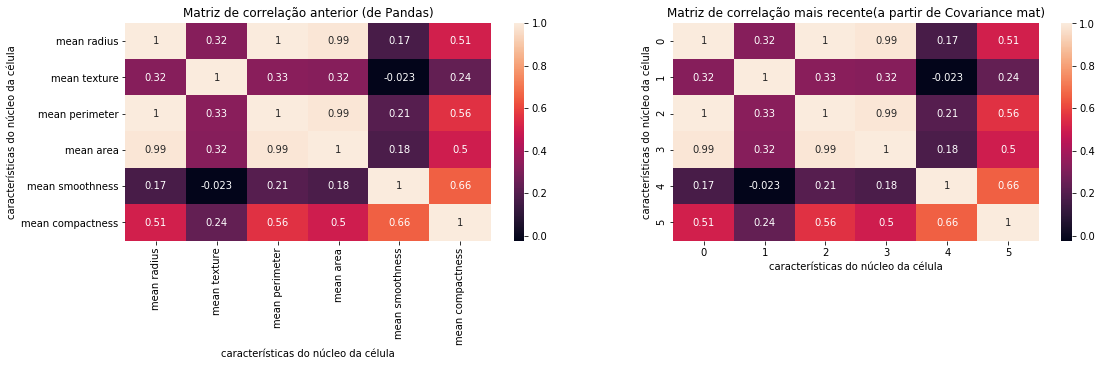

In [62]:
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)

sns.heatmap(correlation_mat, annot = True)

plt.title("Matriz de correlação anterior (de Pandas)")

plt.xlabel("características do núcleo da célula")

plt.ylabel("características do núcleo da célula")

plt.subplot(1,2,2)

sns.heatmap(new_corr, annot = True)

plt.title("Matriz de correlação mais recente(a partir de Covariance mat)")

plt.xlabel("características do núcleo da célula")

plt.ylabel("características do núcleo da célula")

plt.show()